In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings ("ignore")


Using TensorFlow backend.
C:\Users\hamim\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hamim\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hamim\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hamim\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv('sample.csv', usecols=[0,9])
df.rename(columns = {"'Time and date'":'Time',"'ABP'":'ABP'}, inplace = True)
df['Time']=df['Time'].apply(lambda x: x.replace('[','').replace(']',''))
df.Time = pd.to_datetime(df.Time)
df=df.set_index('Time')


In [3]:

train, test =df[:20000],df[20000:25000]
scaler=MinMaxScaler()
scaler.fit(train)
train= scaler.transform(train)
test=scaler.transform(test)


In [ ]:
n_input = 500
n_features = 1


generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features )))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=20)

In [ ]:
pred_list =[]
batch=train[-n_input:].reshape( (1, n_input, n_features))
for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

In [ ]:

df_predict = pd. DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test =pd.concat ([df, df_predict], axis=1)

In [70]:
df_test.tail()

,ABP,Predictions
Time,,
2016-07-15 13:19:21.920,73.6,96.644134
2016-07-15 13:19:21.928,71.2,96.361938
2016-07-15 13:19:21.936,69.6,96.055956
2016-07-15 13:19:21.944,68.8,95.736757
2016-07-15 13:19:21.952,67.2,95.402405


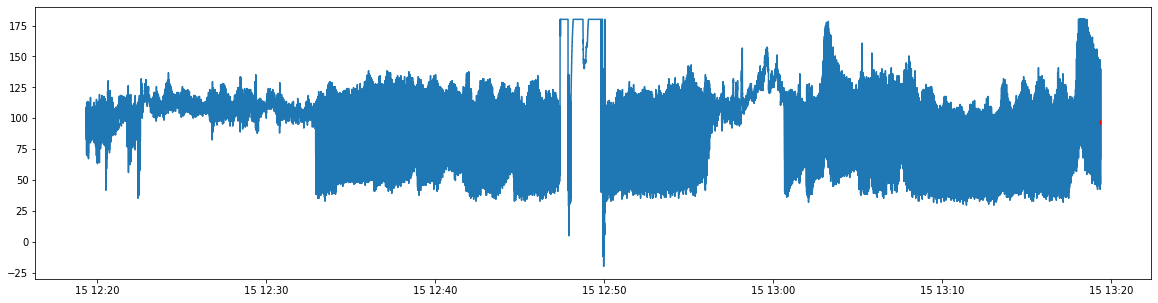

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['ABP'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()


In [65]:
train=df
scaler.fit(train)
train= scaler.transform(train)
n_input = 12
n_features = 1


generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model.fit_generator(generator, epochs=20)
pred_list =[]
batch=train[-n_input:].reshape( (1, n_input, n_features))
for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)


Epoch 1/20
 4658/74998 [>.............................] - ETA: 8:21 - loss: 2.6186e-04

KeyboardInterrupt: 

In [40]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame (index=add_dates[1:], columns=df.columns)


In [41]:
future_dates.tail()

,ABP
2017-03-15 12:19:29.952,NaN
2017-04-15 12:19:29.952,NaN
2017-05-15 12:19:29.952,NaN
2017-06-15 12:19:29.952,NaN
2017-07-15 12:19:29.952,NaN


In [42]:
df_predict = pd. DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_proj =pd.concat ([df, df_predict], axis=1)

In [43]:
df_proj.tail(12)

,ABP,Predictions
Time,,
2016-07-15 12:19:29.864,77.6,75.044104
2016-07-15 12:19:29.872,76.8,75.611251
2016-07-15 12:19:29.880,76.0,76.519930
2016-07-15 12:19:29.888,76.0,77.735519
2016-07-15 12:19:29.896,75.2,79.113334
2016-07-15 12:19:29.904,75.2,80.638526
2016-07-15 12:19:29.912,75.2,82.318635
2016-07-15 12:19:29.920,74.4,84.169753
2016-07-15 12:19:29.928,74.4,86.081356


No handles with labels found to put in legend.


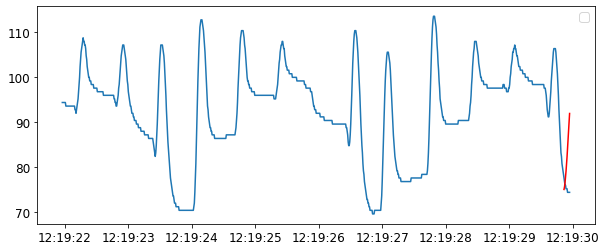

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(df_proj.index, df_proj['ABP'])
plt.plot(df_proj.index, df_proj['Predictions'], color='r')
plt.legend (loc='best', fontsize='large')
plt.xticks (fontsize=12)
plt.yticks(fontsize=12)
plt.show()